# Introducción a Python para IA.

<a href="https://github.com/luiggix/intro_MeIA_2023">intro_MeIA_2023</a> by Luis M. de la Cruz Salas is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>.

# Objetivos.
Aplicar tus conocimientos de numpy y álgebra lineal a la solución de un sistema de ecuaciones.

# Cruce de dos rectas.

Las siguientes dos rectas se cruzan en algún punto.

$$
\begin{array}{ccc}
3x_0 + 2x_1 & = &2 \\
2x_0 + 6x_1 & = &-8
\end{array}
$$

Las ecuaciones de las rectas se pueden escribir como:

$$
\begin{array}{ccc}
\dfrac{3}{2}x_0 + x_1 & = & \dfrac{2}{2} \\
\dfrac{2}{6}x_0 + x_1 & = & -\dfrac{8}{6}
\end{array} \Longrightarrow
\begin{array}{ccc}
y_0 = m_0 x + b_0 \\
y_1 = m_1 x + b_1
\end{array} \text{ donde }
\begin{array}{ccc}
m_0 = -\dfrac{3}{2} & b_0 = 1 \\
m_1 = -\dfrac{2}{6} & b_1 = -\dfrac{8}{6}
\end{array}
$$

Ahora realizaremos la gráfica de las rectas:

## Gráfica de las rectas

In [3]:
import numpy as np
import ipywidgets as widgets
import macro
import macti.visual

<div class="alert alert-success">
<b>Creación de arreglos.</b>
Revisa como se crean arreglos simples y multidimensionales, cálculo de normas y solución de sistema de ecuaciones usando <b>numpy</b> en la siguiente notebook: <a href="T15_Numpy.ipynb">T15_Numpy.ipynb</a>.
</div>

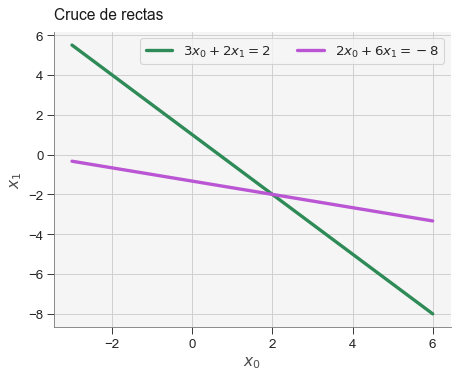

In [4]:
m0 = -3/2
b0 = 1
m1 = -2/6
b1 = -8/6
x = np.linspace(-3,6,10)
y0 = m0 * x + b0
y1 = m1 * x + b1 

# Esta función grafica las rectas
macro.graf_rectas(x, y0, y1)

## Sistema lineal.

Las ecuaciones de las rectas se pueden escribir en forma de un sistema lineal:

$$
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right] =
\left[
\begin{array}{c}
2 \\ 
-8
\end{array} \right]
\tag{1}
$$

Podemos calcular el cruce de las rectas resolviendo el sistema lineal:

In [5]:
A = np.array([[3, 2],[2,6]] )
b = np.array([[2,-8]])
print("Matriz A : \n",A)
print("Vector b : \n", b)

sol = np.linalg.solve(A,b[0]) # Función del módulo linalg para resolver el sistema
print("Solución del sistema: ", sol)

Matriz A : 
 [[3 2]
 [2 6]]
Vector b : 
 [[ 2 -8]]
Solución del sistema:  [ 2. -2.]


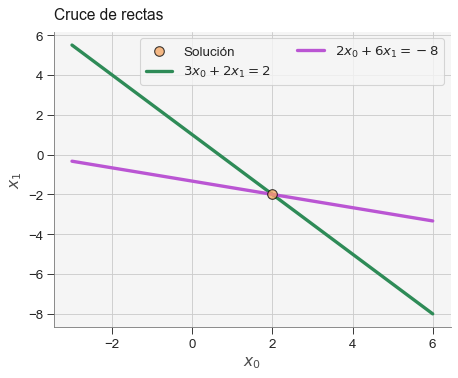

In [6]:
# Esta función grafica el punto de cruce de las rectas.
macro.graf_sol(sol)

macro.graf_rectas(x, y0, y1)

En general, un sistema de ecuaciones de $n \times n$ se escribe como sigue:

$$
\begin{array}{ccccccc}
a_{11}x_1 & + & a_{12}x_2 & +  \dots  + & a_{1n}x_n & = & b_1 \\
a_{21}x_1 & + & a_{22}x_2 & +  \dots + & a_{2n}x_n & = & b_2 \\
\vdots & & \vdots &  & \vdots & & \vdots \\
a_{i1}x_1 & + & a_{i2}x_2 & +  \dots + & a_{in}x_n & = & b_i \\
\vdots & & \vdots &  & \vdots & & \vdots \\
a_{n1}x_1 & + & a_{n2}x_2 & + \dots + & a_{nn}x_n & = & b_n
\end{array}
$$

Es posible usar diferentes métodos para encontrar resolver este tipo de sistemas. Veamos algunos.

# Método de Jacobi

* En este método, de la primera ecuación se despeja $x_1$; de la segunda ecuación se despeja $x_2$; y a sí sucesivamente, de tal manera que obtenemos:
$$
\begin{eqnarray*}
	x_1 & = &\left( b_1 - (a_{12}x_2 +  \dots  + a_{1n}x_n) \right) / a_{11}  \\
	x_2 & = &\left( b_2 - (a_{21}x_1 +  \dots  + a_{2n}x_n) \right) / a_{22} \\
	\vdots & & \vdots \\
	x_i & = &\left( b_i - (a_{i1}x_1 +  \dots  + a_{in}x_n) \right) / a_{ii} \\
	\vdots & & \vdots \\
	x_n & = &\left( b_n - (a_{n1}x_1 +  \dots  + a_{nn-1}x_{n-1}) \right) / a_{nn}
\end{eqnarray*}
$$

* Suponemos ahora que tenemos una solución inicial aproximada $\mathbf{x}^0 = [x_1^0, \dots, x_n^0]$. Usando esta solución inicial, es posible hacer una nueva aproximación para obtener  $\mathbf{x}^1 = [x_1^1, \dots, x_n^1]$ como sigue:

$$
\begin{eqnarray*}
	x_1^1 & = &\left( b_1 - (a_{12}x_2^0 +  \dots  + a_{1n}x_n^0) \right) / a_{11}  \\
	x_2^1 & = &\left( b_2 - (a_{21}x_1^0 +  \dots  + a_{2n}x_n^0) \right) / a_{22} \\
	\vdots & & \vdots \\
	x_i^1 & = &\left( b_i - (a_{i1}x_1^0 +  \dots  + a_{in}x_n^0) \right) / a_{ii} \\
	\vdots & & \vdots \\
	x_n^1 & = &\left( b_n - (a_{n1}x_1^0 +  \dots  + a_{nn-1}x_{n-1}^0) \right) / a_{nn}
\end{eqnarray*}
$$

* En general para $i = 1, \dots, n$ y $k = 1, 2, \dots$ tenemos:

$$
x_i^k = \frac{1}{a_{i,i}} \left(b_i -  \sum_{j \neq i} a_{i,j} x_j^{k-1} \right)
$$

* En términos de matrices, la **iteración de Jacobi** se escribe:
$$
\mathbf{x}^k = -\mathbf{D}^{-1} \mathbf{B}\mathbf{x}^{k-1} + \mathbf{D}^{-1} \mathbf{b}
$$

donde $\mathbf{D}$ es la matriz diagonal y $\mathbf{B} = \mathbf{A} - \mathbf{D}$.

* El cálculo de cada componente $x_i^k$ es independiente de las otras componentes, por lo que este método se conoce también como de  *desplazamientos simultáneos*.


## Algoritmo 1.
En general, podemos definir el siguiente algoritmo para el método de Jacobi.
<center>
<img src="../utils/fig/Jacobi.png"  width='500px'/>
</center>

## Implementación 1.


In [7]:
def jacobi(A,b,tol,kmax,xi, yi):
    N = len(b[0])
    xnew = np.zeros(N)
    xold = np.zeros(N)
    
    # Solución inicial
    xold[0] = xi
    xold[1] = yi
    
    xs = [xi]
    ys = [yi]
    
    e = 10
    error = [] 
    
    k = 0
    print('{:^2} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'x0', 'x1'))
    while(e > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xold[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[0,i] - xnew[i]) / A[i,i]
        
        # Almacenamos la solución actual
        xs.append(xnew[0])
        ys.append(xnew[1])
        
        e = np.linalg.norm(xnew-xold,1)
        error.append(e)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, e, xnew[0], xnew[1]))
    return xnew, np.array(xs), np.array(ys), error, k

---
<a name='ej-3'></a>
### **<font color="DodgerBlue">Ejercicio 3. Aplicación del método de Jacobi.</font>**

<font color="DarkBlue"> Haciendo uso de la función `jacobi` definida en la celda superior, aproxima la solución del sistema de ecuaciones (1). Utiliza la solución inicial `xini` = $(-2, 2)$, una tolerancia `tol` = $1 \times 10^{-5}$ y `kmax` = $50$ iteraciones.</font>
    
---

In [8]:
# Solución inicial
xi, yi = -2, 2
tol = 1e-5
kmax = 50

# Método de Jacobi
solJ, xs, ys, eJ, itJ = jacobi(A, b, tol, kmax, xi, yi)

 i    Error         x0           x1     
 1 4.000000000 (-0.666666667, -0.666666667)
 2 2.222222222 (1.111111111, -1.111111111)
 3 0.888888889 (1.407407407, -1.703703704)
 4 0.493827160 (1.802469136, -1.802469136)
 5 0.197530864 (1.868312757, -1.934156379)
 6 0.109739369 (1.956104252, -1.956104252)
 7 0.043895748 (1.970736168, -1.985368084)
 8 0.024386526 (1.990245389, -1.990245389)
 9 0.009754611 (1.993496926, -1.996748463)
10 0.005419228 (1.997832309, -1.997832309)
11 0.002167691 (1.998554873, -1.999277436)
12 0.001204273 (1.999518291, -1.999518291)
13 0.000481709 (1.999678861, -1.999839430)
14 0.000267616 (1.999892954, -1.999892954)
15 0.000107046 (1.999928636, -1.999964318)
16 0.000059470 (1.999976212, -1.999976212)
17 0.000023788 (1.999984141, -1.999992071)
18 0.000013216 (1.999994714, -1.999994714)
19 0.000005286 (1.999996476, -1.999998238)


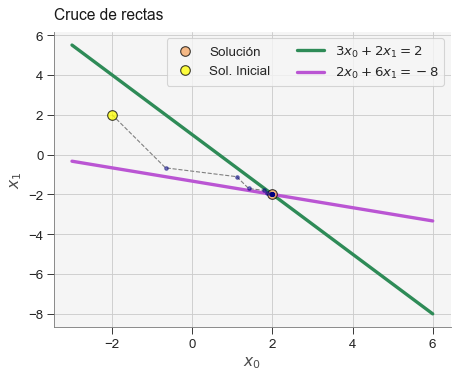

In [9]:
macro.graf_sol(solJ)
macro.graf_pasos(solJ, xs, ys, True)
macro.graf_rectas(x, y0, y1)
macro.savefig('Jacobi.pdf')

## Cálculo del error

* Definimos $e_i^k = x_i^k - x_i$ como la diferencia entre la $i$-ésima componente  de la solución exacta y la $i$-ésima componente de la $k$-ésima iteración, de tal manera que $\mathbf{e} = [e_1, \dots, e_n]^T$ es el vector error.

* Aplicando una vez la iteración de Jacobi para $x_i$ y $x_i^{k+1}$ podemos escribir la diferencia como sigue:

$$
\begin{eqnarray*}
\left| e_i^{k+1} \right| & = &\left| x_i^{k+1} - x_i  \right| \\
\left| e_i^{k+1} \right| & = & \left|
\frac{1}{a_{i,i}} \left(b_i - \sum_{j \neq i} a_{i,j} x_j^{k} \right) -
\frac{1}{a_{i,i}} \left(b_i - \sum_{j \neq i} a_{i,j} x_j \right) \right| \\
\left| e_i^{k+1} \right| & = & \left| -\sum_{j \neq i} \frac{a_{i,j}}{a_{i,i}} (x_j^k - x_j)\right| \\
\left| e_i^{k+1} \right| & = & \left| -\sum_{j \neq i} \frac{a_{i,j}}{a_{i,i}} e_j^k \right| 
\le \sum_{j \neq i} \left| \frac{a_{i,j}}{a_{i,i}} \right| || \mathbf{e}^k ||_\infty, \qquad \forall i, k .
\end{eqnarray*}
$$

* En particular:
$$
\max_{1 \le i \le n} \left( \left| e_i^{k+1} \right| \right) =  || \mathbf{e}^{k+1} ||_\infty
 \le \sum_{j \neq i} \left| \frac{a_{i,j}}{a_{i,i}} \right| || \mathbf{e}^k ||_\infty
$$

* Definimos $\displaystyle K = \max_{1 \le i \le n} \sum_{j \neq i} \left| \frac{a_{i,j}}{a_{i,i}} \right|$ entonces:

$$
\begin{eqnarray*}
|| \mathbf{e}^{k+1} ||_\infty & \le &  K || \mathbf{e}^{k} ||_\infty \le K \left( K || \mathbf{e}^{k-1} ||_\infty \right) \le
\dots \le K^k || \mathbf{e}^{1} ||_\infty \\
|| \mathbf{e}^{k+1} ||_\infty & \le &  K^k || \mathbf{e}^{1} ||_\infty
\end{eqnarray*}
$$

* Si $K < 1$ entonces $\mathbf{e}^{k} \rightarrow 0$ cuando $k \rightarrow \infty$

* La condición $K < 1$ implica:
$$
\sum_{j \neq i} |a_{i,j}| < |a_{i,i}|, \forall i
$$

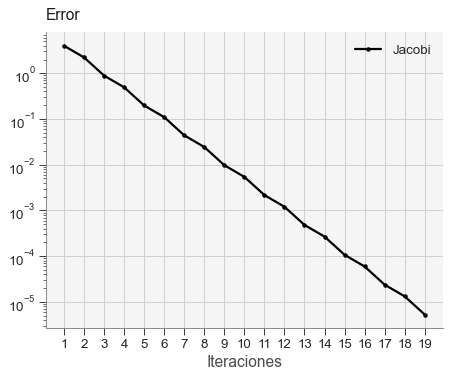

In [10]:
d_error = {'Jacobi':eJ}
macro.graf_error(d_error)

# Método de Gauss-Seidel

* La principal diferencia con el método de Jacobi es que las ecuaciones se analizan en un orden determinado.

* Por ejemplo, si realizamos el cálculo en orden ascendente y ya hemos evaluado $x_1$ y $x_2$, para evaluar $x_3$ haríamos lo siguiente:}
$$
\begin{eqnarray*}
\underline{x_1^1} & = &\left( b_1 - (a_{12}x_2^0 + a_{13} x_3^0 + \dots  + a_{1n}x_n^0) \right) / a_{11}  \\
\underline{x_2^1} & = &\left( b_2 - (a_{21}\underline{x_1^1} + a_{23}x_3^0 + \dots  + a_{2n}x_n^0) \right) / a_{22} \\
x_3 & = &\left( b_3 - (a_{31}\underline{x_1^1} + a_{32}\underline{x_2^1} + \dots  + a_{3n}x_n^0)\right) / a_{22}
\end{eqnarray*}
$$

* En general la fórmula del método es como sigue:
$$
x_i^k = \frac{1}{a_{i,i}} \left(b_i -  \sum_{j < i} a_{i,j} \underline{x_j^{k}} 
- \sum_{j > i} a_{i,j} x_j^{k-1} \right) 
$$   

* Este algoritmo es serial dado que cada componente depende de que las componentes previas se hayan calculado (*desplazamientos sucesivos*).

* El valor de la nueva iteración $\mathbf{x}^k$ depende del orden en que se examinan las componentes. Si se cambia el orden, el valor de $\mathbf{x}^k$ cambia.


## Algoritmo 2.
En general, podemos definir el siguiente algoritmo para el método de Gauss-Seidel.

<center>
<img src="../utils/fig/Gauss_Seidel.png"  width='500px'/>
</center>

## Implementación 2.

In [11]:
def gauss_seidel(A,b,tol,kmax,xi,yi):
    N = len(b[0])
    xnew = np.zeros(N)
    xold = np.zeros(N)
    
    # Solución inicial
    xold[0] = xi
    xold[1] = yi

    xs = [xi]
    ys = [yi]
    
    e = 10
    error = [] 
    
    k = 0
    print('{:^2} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'x0', 'x1'))
    while(e > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xnew[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[0,i] - xnew[i]) / A[i,i]
            
        # Almacenamos la solución actual
        xs.append(xnew[0])
        ys.append(xnew[1])

        e = np.linalg.norm(xnew-xold,1)
        error.append(e)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, e, xnew[0], xnew[1]))
    return xnew, np.array(xs), np.array(ys), error, k

---
<a name='ej-4'></a>
### **<font color="DodgerBlue">Ejercicio 4. Aplicación del método de Gauss-Seidel.</font>**

<font color="DarkBlue">Haciendo uso de la función `gauss_seidel` definida en la celda superior, aproxima la solución del sistema de ecuaciones del Ejercicio 1. Utiliza la solución inicial `xini` = $(0, 0)$, una tolerancia `tol` = $1 \times 10^{-5}$ y `kmax` = $100$ iteraciones. Guarda la solución aproximada que devuelve la función en `solucion`.</font>
    
---

In [12]:
# Solución inicial
# xi, yi = 
# tol = 
# kmax = 

# Método de Gauss-Seidel
# ...

### BEGIN SOLUTION
# Solución inicial
xi, yi = -2, 2
tol = 1e-5
kmax = 50

# Método de Gauss-Seidel
solG, xs, ys, eG, itG = gauss_seidel(A, b, tol, kmax, xi, yi)
### END SOLUTION

 i    Error         x0           x1     
 1 4.444444444 (-0.666666667, -1.111111111)
 2 2.765432099 (1.407407407, -1.802469136)
 3 0.614540466 (1.868312757, -1.956104252)
 4 0.136564548 (1.970736168, -1.990245389)
 5 0.030347677 (1.993496926, -1.997832309)
 6 0.006743928 (1.998554873, -1.999518291)
 7 0.001498651 (1.999678861, -1.999892954)
 8 0.000333033 (1.999928636, -1.999976212)
 9 0.000074007 (1.999984141, -1.999994714)
10 0.000016446 (1.999996476, -1.999998825)
11 0.000003655 (1.999999217, -1.999999739)


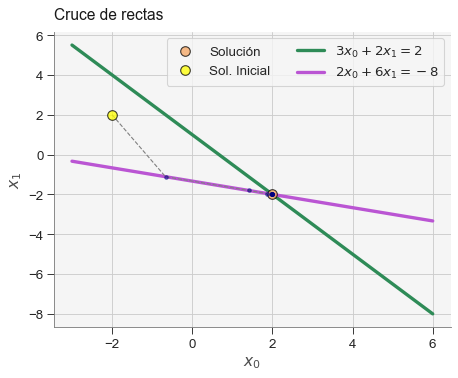

In [13]:
macro.graf_sol(solG)
macro.graf_pasos(solG, xs, ys, True)
macro.graf_rectas(x, y0, y1)
macro.savefig('Gauss_Seidel.pdf')

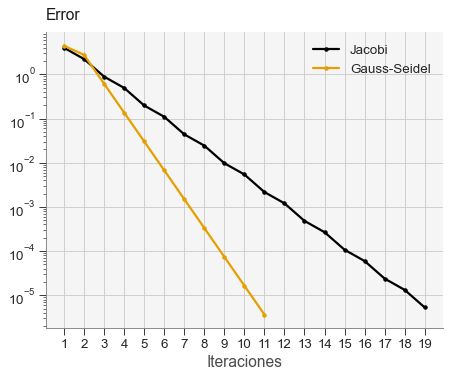

In [14]:
d_error.update({'Gauss-Seidel':eG})
macro.graf_error(d_error)

# Método de Sobrerelajación sucesiva (*Successive Overrelaxation*, SOR)

* Se obtiene apicando una extrapolación a la iteración de Gauss-Seidel.

* Esta extrapolación es un promedio pesado entre la iteración actual y la anterior:
$$
x_i^k = \omega \bar{x}_i^k + (1-\omega)x_i^{k-1}
$$
donde $\bar{x}$ denota una iteraci\'on de Gauss-Seidel y $\omega$ es el
factor de extrapolaci\'on.

* En términos de matrices tenemos:
$$
\mathbf{x}^k = (\mathbf{D} - \omega \mathbf{L})^{-1}(\omega \mathbf{U} + (1 - \omega )\mathbf{D})\mathbf{x}^{k-1} 
+ \omega (\mathbf{D} - \omega \mathbf{L})^{-1} \mathbf{b}
$$
* Elegir la $\omega$ óptima no es simple, aunque se sabe que si $\omega$ 
est\'a fuera del intervalo $(0,2)$ el m\'etodo falla.

## Implementación 3.

In [15]:
def sor(A,b,tol,kmax,w,xi,yi):
    N = len(b[0])
    xnew = np.zeros(N)
    xold = np.zeros(N)

    # Solución inicial
    xold[0] = xi
    xold[1] = yi

    xs = [xi]
    ys = [yi]
    
    e = 10
    error = [] 
    
    k = 0
    while(e > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            sigma = 0
            for j in range(0,i):
                sigma += A[i,j] * xnew[j]
            for j in range(i+1,N):
                sigma += A[i,j] * xold[j]                
            sigma = (b[0,i] - sigma) / A[i,i]
            xnew[i] = xold[i] + w * (sigma -xold[i])
            
        # Almacenamos la solución actual
        xs.append(xnew[0])
        ys.append(xnew[1])
        
        e = np.linalg.norm(xnew-xold, 1)
        
        error.append(e)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, e, xnew[0], xnew[1]))
    return xnew, np.array(xs), np.array(ys), error, k

In [16]:
# Solución inicial
# ...

# Método de SOR, probar con w = 1.09, 1.8, 1.99, 2.0
# ...

### BEGIN SOLUTION
# Solución inicial
xi, yi = -2, 2
tol = 1e-5
kmax = 50

# Método de SOR, probar con w = 1.09, 1.8, 1.99, 2.0
w = 1.09
solSOR, xs, ys, eSOR, itSOR = sor(A, b, tol, kmax, w, xi, yi)
### END SOLUTION

 1 4.888044444 (-0.546666667, -1.434711111)
 2 2.915282134 (1.818423407, -1.984903171)
 3 0.205355323 (2.005371531, -2.003310371)
 4 0.006359375 (2.001922098, -2.000400429)
 5 0.002197707 (2.000117990, -2.000006831)
 6 0.000133145 (1.999994345, -1.999997330)
 7 0.000006614 (1.999998569, -1.999999720)


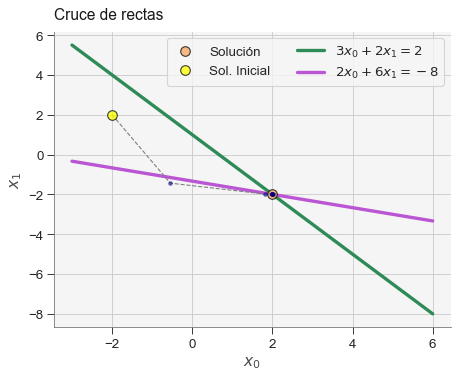

In [18]:
macro.graf_sol(solSOR)
macro.graf_pasos(solSOR, xs, ys, True)
macro.graf_rectas(x, y0, y1)
macro.savefig('SOR.pdf')

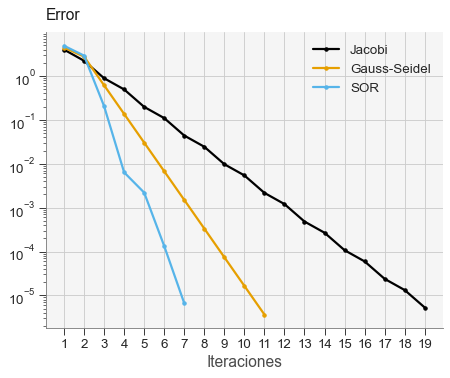

In [19]:
d_error.update({'SOR':eSOR})
macro.graf_error(d_error)

# Métodos del subespacio de Krylov
Una excelente referencia para comenzar con estos métodos es la siguiente:

Shewchuk, J. R. (1994). [An Introduction to the Conjugate Gradient Method Without the Agonizing Pain](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf). Carnegie-Mellon University. Department of Computer Science.

## Cálculo de eigenvectores

<div class="alert alert-success">
<b>Creación de arreglos.</b>
Revisa como se calculan eigenvectores y eigenvalores, y cómo se apilan y concatenan arreglos usando <b>numpy</b> en la siguiente notebook: <a href="T15_Numpy.ipynb">T15_Numpy.ipynb</a>.
</div>

In [25]:
# Cálculo de eigenvectores
eigen = np.linalg.eig(A)


# Impresión de los eigenvalores y eigenvectores
print('eigenvalores = {}'.format(eigen[0]))
print('eigenvectores:\n {} \n {}'.format(eigen[1][0], eigen[1][1]))

# Cálculo del ángulo entre los vectores.
e0 = eigen[1][0] / np.linalg.norm(eigen[1][0])
e1 = eigen[1][1] / np.linalg.norm(eigen[1][1])
angulo = np.arccos(np.dot(e0, e1)) * 180 / np.pi
print('ángulo entre eigenvectores = {}'.format(angulo))

eigenvalores = [2. 7.]
eigenvectores:
 [-0.89442719 -0.4472136 ] 
 [ 0.4472136  -0.89442719]
ángulo entre eigenvectores = 90.0


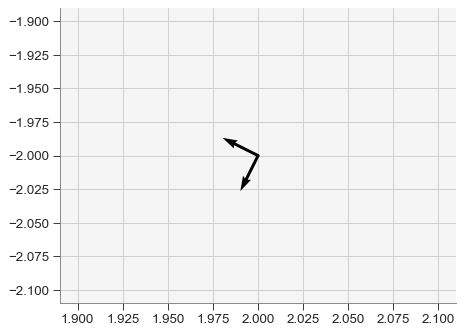

In [21]:
xe,ye = np.meshgrid([sol[0], sol[0]],[sol[1], sol[1]])
u = np.hstack( (eigen[1][0], np.array([0, 0])) ) 
v = np.hstack( (eigen[1][1], np.array([0, 0])) ) 

macro.graf_eigen(xe, ye, u, v)

In [ ]:
macro.graf_eigen(xe, ye, u, v)
macro.graf_rectas(x, y0, y1)
macro.graf_sol(sol)

## Forma cuadrática

$ f(x) = \dfrac{1}{2} \mathbf{x}^T A \mathbf{x} - \mathbf{x}^T \mathbf{b} + c $

$
A =
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right],
x =
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right],
b =
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right], 
c =
\left[
\begin{array}{c}
0\\ 0
\end{array}
\right], 
$

$ f^\prime(x) = \dfrac{1}{2} A^T \mathbf{x} + \dfrac{1}{2} A \mathbf{x} - \mathbf{b} $

- Cuando $A$ es simétrica: $ f^\prime(x) = A \mathbf{x} - \mathbf{b} $
- Entonces un punto crítico de $f(x)$ se obtiene cuando $ f^\prime(x) = A \mathbf{x} - \mathbf{b} = 0$, es decir cuando $A \mathbf{x} = \mathbf{b}$


In [ ]:
f = lambda A,b,c,x: 0.5 * x @ A @ x.T - x @ b.T + c

In [ ]:
size_grid = 30

xg,yg = np.meshgrid(np.linspace(-3,6,size_grid),
                    np.linspace(-8,6,size_grid))

z = np.zeros((size_grid, size_grid))

for i in range(size_grid):
    for j in range(size_grid):
        xc = np.array([[xg[i,j], yg[i,j]]])
        z[i,j] = f(A,b,0,xc)

In [ ]:
macro.graf_fcuad(sol,xg, yg, z, cmap='twilight')

In [ ]:
widgets.interactive(macro.graf_fcuad,
                    sol = widgets.fixed(sol),
                    xg = widgets. fixed(xg), yg = widgets. fixed(yg),
                    z = widgets. fixed(z), 
                    elev = widgets.FloatSlider(min=0, max=180, value = 5, step=5),
                    azim = widgets.FloatSlider(min=0, max=180, value = -30, step=5),
                    levels = widgets.fixed(0),
                    cmap = widgets.fixed('twilight')) 

In [ ]:
macro.graf_eigen(xe, ye, u, v)
macro.graf_sol(sol)
macro.graf_fcuad(sol, xg, yg, z, levels=25, cmap='twilight')
macro.graf_rectas(x, y0, y1)

## Algoritmo del descenso del gradiente.

$
\begin{array}{l}
\text{Input} : \mathbf{x}_0, tol \\
\mathbf{r}_0 = \mathbf{b}-A\mathbf{x}_0 \\
k = 0 \\
\text{WHILE}(\mathbf{r}_k > tol) \\
\qquad \mathbf{r}_k \leftarrow \mathbf{b}-A\mathbf{x}_k \\
\qquad \alpha_k \leftarrow \dfrac{\mathbf{r}_k^T\mathbf{r}_k}{\mathbf{r}_k^T A \mathbf{r}_k} \\
\qquad \mathbf{x}_{k+1} \leftarrow \mathbf{x}_k + \alpha_k \mathbf{r}_k \\
\qquad k \leftarrow k + 1 \\
\text{ENDWHILE}
\end{array}
$

### Implementación 4.

In [ ]:
def steepest(A,b,x,tol,kmax):
    xs, ys = [x[0,0]], [x[1,0]]
    r = b.T - A @ x
    res = np.linalg.norm(r)
    res_list = []
    k = 0
    while(res > tol and k < kmax):
        alpha = r.T @ r / (r.T @ A @ r)
        x = x + r * alpha
        xs.append(x[0,0])
        ys.append(x[1,0])
        r = b.T - A @ x
        res = np.linalg.norm(r,1)
        res_list.append(res)
        k += 1
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, res, x[0,0], x[1,0]))
    return x, np.array(xs), np.array(ys), res_list, k

In [ ]:
# Solución inicial (debe darse como un arreglo tipo columna)
# xini = ...

# Método Steepest descend
# ...

### BEGIN SOLUTION
# Solución inicial
xi, yi = -2., 2.
xini = np.array([xi, yi]).reshape(-1,1) 
tol = 1e-5
kmax = 50

# Método Steepest descend
solGrad, xs, ys, resGrad, itGrad = steepest(A, b, xini, tol, kmax)
### END SOLUTION

In [ ]:
macro.graf_sol(solGrad)
macro.graf_fcuad(solGrad, xg, yg, z, levels=25, cmap='twilight')
macro.graf_pasos(solGrad, xs, ys, True)
macro.graf_rectas(x, y0, y1)
macro.savefig('Steepest.pdf')

In [ ]:
d_error.update({'Descenso Grad':resGrad})
macro.graf_error(d_error)

## Algoritmo de Gradiente Conjugado

$
\begin{array}{l}
\text{Input} : A, \mathbf{b}, \mathbf{x}_0, k_{max}, tol \\
\mathbf{d_0} = \mathbf{r}_0 = \mathbf{b} - A \mathbf{x}_0 \\ 
k = 0 \\
\text{While} (||\mathbf{r}|| > tol \quad \text{AND} \quad k < k_{max} ) \\
\qquad \alpha_k = \frac{\mathbf{r}_k^T \mathbf{r}_k}{\mathbf{d}_k^T A \mathbf{d}_k} \\
\qquad \mathbf{x}_{k+1} = \mathbf{x}_{k} + \alpha_k \mathbf{d}_{k} \\
\qquad \mathbf{r}_{k+1} = \mathbf{r}_{k} - \alpha_k A \mathbf{d}_{k} \\
\qquad \beta_{k+1} = \frac{\mathbf{r}_{k+1}^T \mathbf{r}_{k+1}}{\mathbf{r}_{k}^T \mathbf{r}_{k}}  \\
\qquad \mathbf{d}_{k+1} = \mathbf{r}_{k+1} + \beta_{k+1} \mathbf{d}_{k} \\
\qquad k = k + 1  \\
\text{End While}
\end{array}
$

### Implementación 5.

In [ ]:
def conjugateGradient(A,b,x,tol,kmax):
    xs, ys = [x[0,0]], [x[1,0]]
    
    r = b.T - A @ x
    d = r
    rk_norm = r.T @ r
    res = np.linalg.norm(rk_norm)
    res_list = []

    k = 0
    while(res > tol and k < kmax):
        alpha = float(rk_norm) / float(d.T @ A @ d)
        x = x + alpha * d
        xs.append(x[0,0])
        ys.append(x[1,0])
        r = r - alpha * A @ d
        res = np.linalg.norm(r)
        res_list.append(res)
        
        rk_old = rk_norm
        rk_norm = r.T @ r
        beta = float(rk_norm) / float(rk_old)
        d = r + beta * d
        k += 1
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, res, x[0,0], x[1,0]))
    return x, np.array(xs), np.array(ys), res_list, k

In [ ]:
# Solución inicial (debe darse como un arreglo tipo columna)
# xini = ...

# Método CGM
# ...

### BEGIN SOLUTION
# Solución inicial
xi, yi = -2., 2.
xini = np.array([xi, yi]).reshape(-1,1) 
tol = 1e-5
kmax = 50

# Método CGM
solCGM, xs, ys, resCGM, itCGM = conjugateGradient(A, b, xini, tol, kmax)
### END SOLUTION

In [ ]:
macro.graf_sol(solGrad)
macro.graf_fcuad(solGrad, xg, yg, z, levels=25, cmap='twilight')
macro.graf_pasos(solGrad, xs, ys, True)
macro.graf_rectas(x, y0, y1)
macro.savefig('CGM.pdf')

In [ ]:
d_error.update({'Gradiente Conjugado':resCGM})
macro.graf_error(d_error)

# Aplicación: Transferencia de calor
Los sistemas de ecuaciones lineales aparecen en muchas aplicaciones. Por ejemplo, para estudiar la transferencia de calor en una placa cuadrada de metal se puede resolver numéricamente una ecuación diferencial parcial. La solución numérica se encuentra resolviendo un sistema lineal como el siguiente:

<center>
<img src="../utils/fig/calor02.png"  width='500px'/>
</center>
    
Estos sistemas suelen ser muy grandes y para resolverlos se requiere de muchas operaciones numéricas, lo que implica también mucho tiempo de cómputo.

In [1]:
%run "../utils/src/zCondCalor_interactive.ipynb"

Output()